In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [15]:
pairs = "adve_adve adve_spee dram_reci ente_reci inte_sing live_vlog play_sing sing_vlog adve_dram adve_vlog dram_sing ente_sing inte_spee movi_movi play_spee spee_spee adve_ente dram_spee ente_spee inte_vlog movi_play play_vlog spee_vlog adve_inte dram_dram dram_vlog ente_vlog live_live movi_reci reci_reci vlog_vlog adve_live dram_ente ente_ente inte_inte live_movi movi_sing reci_sing adve_movi dram_inte ente_inte inte_live live_play movi_spee reci_spee adve_play dram_live ente_live inte_movi live_reci movi_vlog reci_vlog adve_reci dram_movi ente_movi inte_play live_sing play_play sing_sing adve_sing dram_play ente_play inte_reci live_spee play_reci sing_spee"
pairs = pairs.split()

domains = set()
for p in pairs:
    a,b = p.split('_')
    domains.add(a)
    domains.add(b)
    
domains = list(domains)
domains.sort()

EER = {}
Threshold = {}
MinDCF_01 = {}
MinDCF_001 = {}

with open('/home/yangwenhao/local/project/SpeakerVerification-pytorch/misc/trails.score', 'r') as f:
    i = 0
    for l in f.readlines():
        l_str = l.split()
        EER[pairs[i]] = float(l_str[2].rstrip('%'))
        Threshold[pairs[i]] = float(l_str[4]) 
        MinDCF_01[pairs[i]] = float(l_str[6]) 
        MinDCF_001[pairs[i]] = float(l_str[8]) 
        i+=1
        

In [16]:
EER_mat = np.zeros((len(domains),len(domains)))
Threshold_mat = np.zeros((len(domains),len(domains)))
MinDCF_01_mat = np.zeros((len(domains),len(domains)))
MinDCF_001_mat = np.zeros((len(domains),len(domains)))

In [25]:
domains2idx = {domains[i]:i for i in range(len(domains))}

for p in pairs:
    a,b = p.split('_')
    a_idx = domains2idx[a]
    b_idx = domains2idx[b]
#     print(a_idx, b_idx)
    
    EER_mat[a_idx][b_idx] = EER[p]
    EER_mat[b_idx][a_idx] = EER[p]
    
    Threshold_mat[a_idx][b_idx] = Threshold[p]
    Threshold_mat[b_idx][a_idx] = Threshold[p]
    
    MinDCF_01_mat[a_idx][b_idx] = MinDCF_01[p]
    MinDCF_01_mat[b_idx][a_idx] = MinDCF_01[p]

    MinDCF_001_mat[a_idx][b_idx] = MinDCF_001[p]
    MinDCF_001_mat[b_idx][a_idx] = MinDCF_001[p]
    

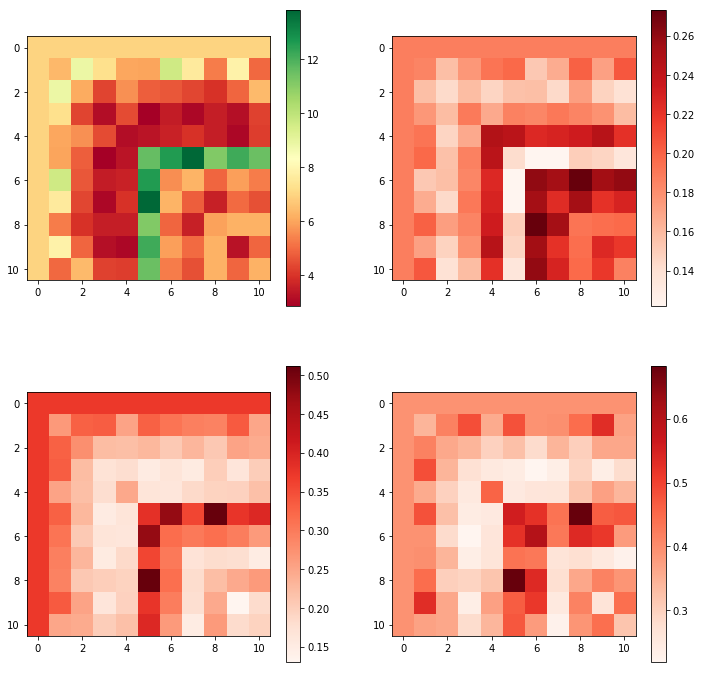

In [41]:
plt.figure(figsize=(12, 12))

norm = matplotlib.colors.Normalize(EER_mat.min(),EER_mat.max())
plt.subplot(2,2,1)
plt.imshow(EER_mat, cmap=plt.cm.RdYlGn, norm = norm)
# plt.matshow(EER_mat, cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(Threshold_mat, cmap=plt.cm.Reds)
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(MinDCF_01_mat, cmap=plt.cm.Reds)
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(MinDCF_001_mat, cmap=plt.cm.Reds)
plt.colorbar()


In [43]:
print(EER_mat)

[[ 6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869
   6.9869  6.9869]
 [ 6.9869  6.3964  8.8669  7.2868  6.0408  6.0073  9.6327  7.6002  5.3238
   7.8886  4.9753]
 [ 6.9869  8.8669  6.1254  4.327   5.6458  4.7884  4.6795  4.3773  3.9633
   4.9192  6.4147]
 [ 6.9869  7.2868  4.327   3.1623  4.4422  2.8429  3.4909  3.0172  3.546
   3.223   4.2794]
 [ 6.9869  6.0408  5.6458  4.4422  3.1767  3.3269  3.6354  3.9957  3.5577
   3.0301  4.1725]
 [ 6.9869  6.0073  4.7884  2.8429  3.3269 11.5981 12.5793 13.8096 11.1111
  12.1769 11.5145]
 [ 6.9869  9.6327  4.6795  3.4909  3.6354 12.5793  5.6054  6.3096  4.9217
   5.8932  5.3069]
 [ 6.9869  7.6002  4.3773  3.0172  3.9957 13.8096  6.3096  4.777   3.6027
   5.0156  4.5324]
 [ 6.9869  5.3238  3.9633  3.546   3.5577 11.1111  4.9217  3.6027  5.9689
   6.2289  6.2687]
 [ 6.9869  7.8886  4.9192  3.223   3.0301 12.1769  5.8932  5.0156  6.2289
   3.2918  4.9252]
 [ 6.9869  4.9753  6.4147  4.2794  4.1725 11.5145  5.3069  4.5324  6.26

In [45]:
np.set_printoptions(linewidth=600)
print(EER_mat)

[[ 6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869  6.9869]
 [ 6.9869  6.3964  8.8669  7.2868  6.0408  6.0073  9.6327  7.6002  5.3238  7.8886  4.9753]
 [ 6.9869  8.8669  6.1254  4.327   5.6458  4.7884  4.6795  4.3773  3.9633  4.9192  6.4147]
 [ 6.9869  7.2868  4.327   3.1623  4.4422  2.8429  3.4909  3.0172  3.546   3.223   4.2794]
 [ 6.9869  6.0408  5.6458  4.4422  3.1767  3.3269  3.6354  3.9957  3.5577  3.0301  4.1725]
 [ 6.9869  6.0073  4.7884  2.8429  3.3269 11.5981 12.5793 13.8096 11.1111 12.1769 11.5145]
 [ 6.9869  9.6327  4.6795  3.4909  3.6354 12.5793  5.6054  6.3096  4.9217  5.8932  5.3069]
 [ 6.9869  7.6002  4.3773  3.0172  3.9957 13.8096  6.3096  4.777   3.6027  5.0156  4.5324]
 [ 6.9869  5.3238  3.9633  3.546   3.5577 11.1111  4.9217  3.6027  5.9689  6.2289  6.2687]
 [ 6.9869  7.8886  4.9192  3.223   3.0301 12.1769  5.8932  5.0156  6.2289  3.2918  4.9252]
 [ 6.9869  4.9753  6.4147  4.2794  4.1725 11.5145  5.3069  4.5324  6.2687  4.9252  6.2566]

In [47]:
pairs = "adad adpl drdr drre enli envl insi lire more plsi revl vlvl addr adre dren drsi enmo inin insp lisi mosi plsp sisi aden adsi drin drsp enpl inli invl lisp mosp plvl sisp adin adsp drli drvl enre inmo lili livl movl rere sivl adli advl drmo enen ensi inpl limo momo plpl resi spsp admo drpl enin ensp inre lipl mopl plre resp spvl"
pairs = pairs.split()

domains = set()
for p in pairs:
    a = p[:2]
    b = p[-2:]
    domains.add(a)
    domains.add(b)
    
domains = list(domains)
domains.sort()

EER = {}
Threshold = {}
MinDCF_01 = {}
MinDCF_001 = {}

with open('/home/yangwenhao/local/project/SpeakerVerification-pytorch/misc/trails.score.2', 'r') as f:
    i = 0
    for l in f.readlines():
        l_str = l.split()
        p = l_str[1].split("-")[2]
        
        EER[p] = float(l_str[3])
        Threshold[p] = float(l_str[5]) 
        MinDCF_01[p] = float(l_str[7]) 
        MinDCF_001[p] = float(l_str[9]) 
        

In [48]:
EER_mat = np.zeros((len(domains),len(domains)))
Threshold_mat = np.zeros((len(domains),len(domains)))
MinDCF_01_mat = np.zeros((len(domains),len(domains)))
MinDCF_001_mat = np.zeros((len(domains),len(domains)))

In [50]:
domains2idx = {domains[i]:i for i in range(len(domains))}

for p in EER:
#     a,b = p.split('_')
    a = p[:2]
    b = p[-2:]
    
    a_idx = domains2idx[a]
    b_idx = domains2idx[b]
#     print(a_idx, b_idx)
    
    EER_mat[a_idx][b_idx] = EER[p]
    EER_mat[b_idx][a_idx] = EER[p]
    
    Threshold_mat[a_idx][b_idx] = Threshold[p]
    Threshold_mat[b_idx][a_idx] = Threshold[p]
    
    MinDCF_01_mat[a_idx][b_idx] = MinDCF_01[p]
    MinDCF_01_mat[b_idx][a_idx] = MinDCF_01[p]

    MinDCF_001_mat[a_idx][b_idx] = MinDCF_001[p]
    MinDCF_001_mat[b_idx][a_idx] = MinDCF_001[p]
  

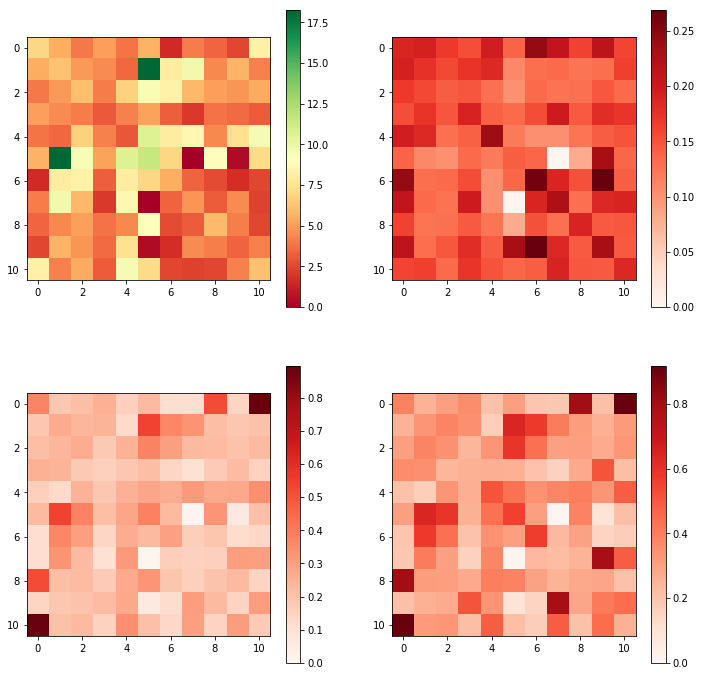

In [51]:
plt.figure(figsize=(12, 12))

norm = matplotlib.colors.Normalize(EER_mat.min(),EER_mat.max())
plt.subplot(2,2,1)
plt.imshow(EER_mat, cmap=plt.cm.RdYlGn, norm = norm)
# plt.matshow(EER_mat, cmap=plt.cm.Blues)
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(Threshold_mat, cmap=plt.cm.Reds)
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(MinDCF_01_mat, cmap=plt.cm.Reds)
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(MinDCF_001_mat, cmap=plt.cm.Reds)
plt.colorbar()


In [77]:
EER_mat>5

array([[ True,  True, False,  True, False,  True, False, False, False, False,  True],
       [ True,  True, False, False, False,  True,  True,  True, False,  True, False],
       [False, False,  True, False,  True,  True,  True,  True,  True, False,  True],
       [ True, False, False, False, False,  True, False, False, False, False, False],
       [False, False,  True, False, False,  True,  True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True, False,  True],
       [False,  True,  True, False,  True,  True,  True, False, False, False, False],
       [False,  True,  True, False,  True, False, False, False, False, False, False],
       [False, False,  True, False, False,  True, False, False,  True, False, False],
       [False,  True, False, False,  True, False, False, False, False, False, False],
       [ True, False,  True, False,  True,  True, False, False, False, False,  True]])

(array([0.13438747, 0.13438747, 0.13438747, 0.40316241, 0.        , 0.26877494, 0.13438747, 0.        , 0.13438747, 0.13438747]),
 array([1.5686 , 2.24507, 2.92154, 3.59801, 4.27448, 4.95095, 5.62742, 6.30389, 6.98036, 7.65683, 8.3333 ]),
 <a list of 1 Patch objects>)

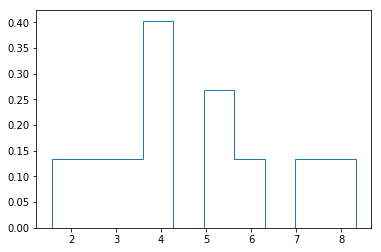

In [68]:
plt.hist(EER_mat[0], histtype='step', density=True,)

In [53]:
all_eer = EER_mat.reshape(-1)

(array([0.01893395, 0.05680186, 0.11360371, 0.1988065 , 0.21774045, 0.16093859, 0.05680186, 0.08520278, 0.07573581, 0.0378679 , 0.05680186, 0.01893395, 0.00946698, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.01893395]),
 array([ 0.4819 ,  1.36955,  2.2572 ,  3.14485,  4.0325 ,  4.92015,  5.8078 ,  6.69545,  7.5831 ,  8.47075,  9.3584 , 10.24605, 11.1337 , 12.02135, 12.909  , 13.79665, 14.6843 , 15.57195, 16.4596 , 17.34725, 18.2349 ]),
 <a list of 20 Patch objects>)

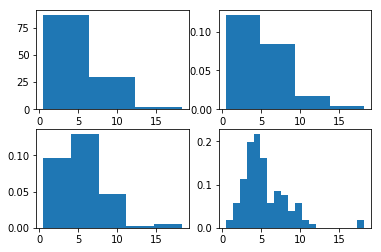

In [76]:
# plt.hist(all_eer)
plt.subplot(2,2,1)
plt.hist(no_zeroeer, bins=3)

plt.subplot(2,2,2)
plt.hist(no_zeroeer, bins=4, density=True,)

plt.subplot(2,2,3)
plt.hist(no_zeroeer, bins=5, density=True,)

plt.subplot(2,2,4)
plt.hist(no_zeroeer, bins=20, density=True,)


array([ 6.9869,  5.5046,  4.005 ,  5.1227,  3.8788,  5.6364,  1.5686,  4.0698,  3.4483,  2.503 ,  8.3333,  5.5046,  6.2398,  4.9599,  4.5167,  3.5343, 18.2349,  8.0674,  9.7281,  4.4394,  5.7559,  4.2259,  4.005 ,  4.9599,  6.1221,  4.1089,  6.7767,  9.4265,  8.4012,  5.8719,  5.1121,  4.8176,  5.4305,  5.1227,  4.5167,  4.1089,  3.0829,  4.2212,  5.175 ,  3.232 ,  2.1078,  3.8163,  3.6038,  3.1821,  3.8788,  3.5343,  6.7767,  4.2212,  3.0452, 10.6237,  8.0728,  8.6432,  4.4795,  7.417 ,  9.5377,  5.6364, 18.2349,  9.4265,  5.175 , 10.6237, 11.5981,  7.0011,  0.    ,  9.0148,  0.4819,
        7.1429,  1.5686,  8.0674,  8.4012,  3.232 ,  8.0728,  7.0011,  5.5389,  3.3983,  2.6518,  1.7445,  2.5028,  4.0698,  9.7281,  5.8719,  2.1078,  8.6432,  0.    ,  3.3983,  4.8081,  3.1911,  4.5541,  2.3952,  3.4483,  4.4394,  5.1121,  3.8163,  4.4795,  9.0148,  2.6518,  3.1911,  5.9758,  4.1787,  2.5234,  2.503 ,  5.7559,  4.8176,  3.6038,  7.417 ,  0.4819,  1.7445,  4.5541,  4.1787,  3.4103,  4.24

In [58]:
no_zeroeer= all_eer[all_eer.nonzero()]

In [59]:
no_zeroeer

array([ 6.9869,  5.5046,  4.005 ,  5.1227,  3.8788,  5.6364,  1.5686,  4.0698,  3.4483,  2.503 ,  8.3333,  5.5046,  6.2398,  4.9599,  4.5167,  3.5343, 18.2349,  8.0674,  9.7281,  4.4394,  5.7559,  4.2259,  4.005 ,  4.9599,  6.1221,  4.1089,  6.7767,  9.4265,  8.4012,  5.8719,  5.1121,  4.8176,  5.4305,  5.1227,  4.5167,  4.1089,  3.0829,  4.2212,  5.175 ,  3.232 ,  2.1078,  3.8163,  3.6038,  3.1821,  3.8788,  3.5343,  6.7767,  4.2212,  3.0452, 10.6237,  8.0728,  8.6432,  4.4795,  7.417 ,  9.5377,  5.6364, 18.2349,  9.4265,  5.175 , 10.6237, 11.5981,  7.0011,  9.0148,  0.4819,  7.1429,
        1.5686,  8.0674,  8.4012,  3.232 ,  8.0728,  7.0011,  5.5389,  3.3983,  2.6518,  1.7445,  2.5028,  4.0698,  9.7281,  5.8719,  2.1078,  8.6432,  3.3983,  4.8081,  3.1911,  4.5541,  2.3952,  3.4483,  4.4394,  5.1121,  3.8163,  4.4795,  9.0148,  2.6518,  3.1911,  5.9758,  4.1787,  2.5234,  2.503 ,  5.7559,  4.8176,  3.6038,  7.417 ,  0.4819,  1.7445,  4.5541,  4.1787,  3.4103,  4.2484,  8.3333,  4.22